# Building Logistic regression in NN style using python and numpy

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import sklearn.datasets
from sklearn.model_selection import train_test_split
%matplotlib inline

### Dataset

((1000, 2), (1000,))


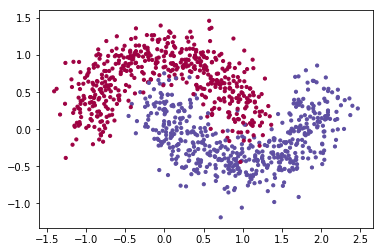

In [43]:
#X,Y = sklearn.datasets.make_circles(n_samples=1000, factor=.5, noise=.3)
X,Y = sklearn.datasets.make_moons(n_samples=1000, noise=.2)
#X, Y = sklearn.datasets.make_blobs(n_samples=1000, random_state=2, n_features=2, centers=2)
print(X.shape, Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
Y_train, Y_test = Y_train.reshape(Y_train.shape[0],1), Y_test.reshape(Y_test.shape[0],1)
X, Y = X.T, Y.reshape(1, Y.shape[0])
X_train, Y_train = X_train.T, Y_train.reshape(1, Y_train.shape[0])
X_test, Y_test = X_test.T, Y_test.reshape(1, Y_test.shape[0])
plt.scatter(X[0, :], X[1, :], c=Y[0], s=10, cmap=plt.cm.Spectral);


For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$



<img src="images/image1.png" style="width:650px;height:400px;">

<img src="images/gradient.png" style="width:350px;height:200px;">

**Mathematical expression of the algorithm**:


The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

In [41]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    num_of_features = X_train.shape[0]
    w, b = initialize(num_of_features)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d
  
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []  
    for i in range(num_iterations):

        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 50 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,"b": b}

    grads = {"dw": dw,"db": db}

    return params, grads, costs


def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)    
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    return Y_prediction

  
def propagate(w, b, X, Y):
    m = X.shape[1]
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)        
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))     

    dw = (1 / float(m)) * np.dot(X, (A - Y).T)
    db = (1 / float(m)) * np.sum(A - Y)
    cost = np.squeeze(cost)    
    grads = {"dw": dw,
             "db": db}
    return grads, cost
  
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

def initialize(dim):
    w = np.zeros(shape=(dim,1))
    b = 0
    return w, b

In [44]:
d = model(X_train, Y_train, X_test, Y_test, num_iterations = 200, learning_rate = 0.01, print_cost = True)

train accuracy: 77.3134328358 %
test accuracy: 83.0303030303 %
